## Library Support

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, MWETokenizer

# got tired of warnings 🙃
import warnings
warnings.filterwarnings('ignore')

# Only need to run once
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Import Data from CSV

In [2]:
data_url = pd.read_csv('C:/Users/subhi/Desktop/30daychallenge/archive/gsearch_jobs.csv')
data_url.date_time = pd.to_datetime(data_url.date_time) # convert to date time
jobs_all = data_url.drop(labels=['Unnamed: 0', 'index'], axis=1, errors='ignore')

In [3]:
jobs_all.head()

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,Full-time,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'python', 'sql', 'r']"
1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,18 hours ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,12 hours ago,Contractor,...,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['power_bi', 'excel', 'powerpoint']"
4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,7 hours ago,Contractor,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['word', 'powerpoint', 'excel', 'outlook']"


## Data Integrity Check

In [4]:
print("Big Query Statistics:")
print("---------------------")
print(f"🚣‍♀️ Rows of data: {len(jobs_all)}")

repeat_jobs = jobs_all.job_id.value_counts()
try:
    repeat_jobs = repeat_jobs[repeat_jobs>1].index[0]
    repeat_jobs = len(repeat_jobs)
except IndexError:
    repeat_jobs = "None"
print(f"👯‍♀️ Number jobs repeated: {repeat_jobs}")

first_date = jobs_all.date_time.dt.date.min()
today_date = datetime.date.today() #+ datetime.timedelta(days=2) # test function works
date_count = pd.DataFrame(jobs_all.date_time.dt.date.value_counts())
missing_dates = list(pd.date_range(start=first_date, end=today_date).difference(date_count.index))
if len(missing_dates) > 0:
    print("❌ Missing data for following dates:")
    for date in missing_dates:
        print(date)
else:
    print(f"✅ No missing dates of data since inception of: {first_date}")

delta_days = (today_date - (first_date - datetime.timedelta(days=2))).days # first day was actually day prior but UTC
jobs_day = round(len(jobs_all)/delta_days)
print(f"🧑‍💻 Average number of jobs per day: {jobs_day}")
print(f"📆 Collecting data for {delta_days} days now...")

Big Query Statistics:
---------------------
🚣‍♀️ Rows of data: 48453
👯‍♀️ Number jobs repeated: 1216
❌ Missing data for following dates:
2022-12-28 00:00:00
2023-05-22 00:00:00
2023-05-23 00:00:00
2024-05-16 00:00:00
2024-05-17 00:00:00
2024-05-18 00:00:00
2024-05-19 00:00:00
2024-05-20 00:00:00
2024-05-21 00:00:00
2024-05-22 00:00:00
🧑‍💻 Average number of jobs per day: 85
📆 Collecting data for 567 days now...


## Exploratory Data Analysis

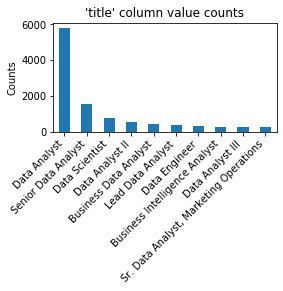

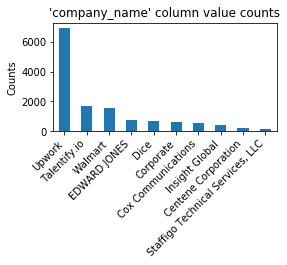

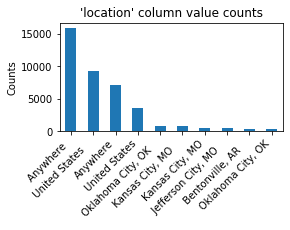

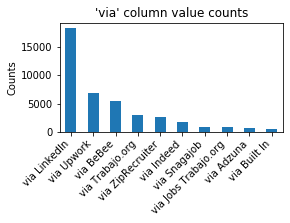

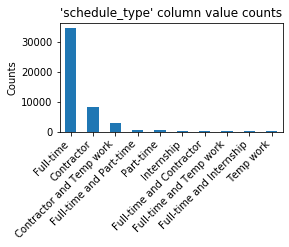

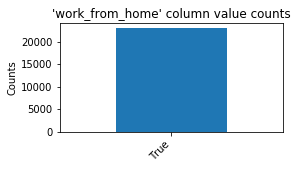

In [5]:
def eda_plot(column, topn=10):
    plt.figure(figsize=(4, 2))
    jobs_all[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 45, ha='right')
    plt.show()

columns = ['title', 'company_name', 'location', 'via', 'schedule_type', 'work_from_home']

for column in columns:
    eda_plot(column)


## Data Cleaning

#### Salary Cleaning - Find min, max, avg, hourly, & yearly

In [6]:
# Separate 'salary' column into that for min max avg and rate (e.g., hourly)
jobs_all[['salary_pay', 'salary_rate']] = jobs_all.salary.str.split(' ', 1, expand=True)
jobs_all.salary_pay = jobs_all.salary_pay.str.replace(',', '').str.replace('$', '').str.replace(' ', '')
jobs_all['salary_avg'] = np.where(jobs_all.salary_pay.str.contains("–"), np.NaN, jobs_all.salary_pay)  # The character U+2013 "–" could be confused with the character U+002d "-", which is more common in source code. Adjust settings
jobs_all['salary_min'] = np.where(jobs_all.salary_pay.str.contains("–"), jobs_all.salary_pay, np.NaN)
jobs_all[['salary_min', 'salary_max']] = jobs_all.salary_min.str.split("–", 1, expand=True)
for column in ['salary_avg', 'salary_min', 'salary_max']:
    jobs_all[column] = np.where(jobs_all[column].str.contains("K"), jobs_all[column].str.replace("K", "").astype(float) * 1000 , jobs_all[column] )
jobs_all['salary_avg'] = np.where(~jobs_all.salary_min.isnull(), (jobs_all.salary_min.astype(float) + jobs_all.salary_max.astype(float))/2 , jobs_all.salary_avg)
jobs_all['salary_hourly'] = np.where(jobs_all.salary_rate == 'an hour', jobs_all.salary_avg.astype(float), np.NaN)
jobs_all['salary_yearly'] = np.where(jobs_all.salary_rate == 'a year', jobs_all.salary_avg.astype(float), np.NaN)

# Standardize salary to all be annual
jobs_all['salary_standardized'] = np.NaN
salary_rate = {'a year': 1, 'an hour': 2080, 'a month': 12}
for key, index in salary_rate.items():
    jobs_all.salary_standardized = np.where(jobs_all.salary_rate == key, jobs_all.salary_avg.astype(float) * index, jobs_all.salary_standardized)

# Used to check results as built above
salary_df = jobs_all[~jobs_all.salary.isnull()]
salary_df = salary_df[['company_name', 'salary', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max', 'salary_standardized', 'salary_hourly', 'salary_yearly']] #, 'salary_min', 'salary_max']
pd.set_option('display.max_rows', salary_df.shape[0]+1)
salary_df.head(10)

,company_name,salary,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_standardized,salary_hourly,salary_yearly
0,Meta,101K–143K a year,101K–143K,a year,122000,101000,143000,122000.0,NaN,122000.0
3,Upwork,15–25 an hour,15–25,an hour,20,15,25,41600.0,20.000,NaN
4,Krispy Kreme,90K–110K a year,90K–110K,a year,100000,90000,110000,100000.0,NaN,100000.0
10,Aquent,54.00–60.52 an hour,54.00–60.52,an hour,57.26,54.00,60.52,119100.8,57.260,NaN
14,CIBA Insurance Services,90K–130K a year,90K–130K,a year,110000,90000,130000,110000.0,NaN,110000.0
21,Saint Louis County Clerks Office,18.33–28.20 an hour,18.33–28.20,an hour,23.265,18.33,28.20,48391.2,23.265,NaN
26,Upwork,50–80 an hour,50–80,an hour,65,50,80,135200.0,65.000,NaN
39,Upwork,8–30 an hour,8–30,an hour,19,8,30,39520.0,19.000,NaN
49,Sompo International,95K–150K a year,95K–150K,a year,122500,95000,150000,122500.0,NaN,122500.0
65,LeadStack Inc.,60–65 an hour,60–65,an hour,62.5,60,65,130000.0,62.500,NaN


Text(0.5, 0, '($USD/hr) Hourly Pay')

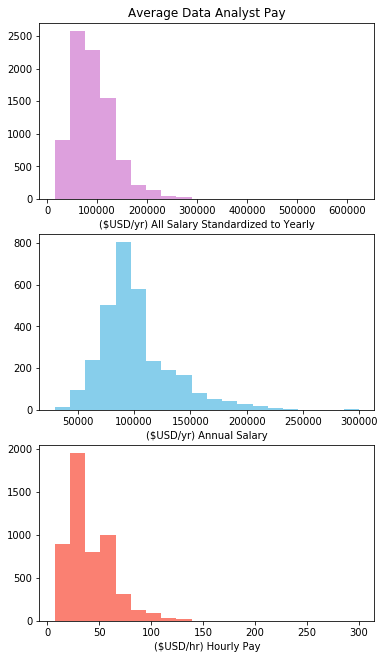

In [7]:
# plt.figure(figsize=(10, 2))
fig, axs = plt.subplots(3)
fig.set_figheight(11)
axs[0].hist(jobs_all.salary_standardized, bins = 20, color = 'plum')
axs[0].set_title("Average Data Analyst Pay")
axs[0].set_xlabel("($USD/yr) All Salary Standardized to Yearly")
axs[1].hist(jobs_all.salary_yearly, bins = 20, color = 'skyblue')
axs[1].set_xlabel("($USD/yr) Annual Salary")
axs[2].hist(jobs_all.salary_hourly, bins = 20, color = 'salmon')
axs[2].set_xlabel("($USD/hr) Hourly Pay")

#### Description Cleaning - Tokenize Languages & Tools

In [8]:
# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql', 
]

keywords_libraries = [
'scikit-learn', 'jupyter', 'theano', 'openCV', 'spark', 'nltk', 'mlpack', 'chainer', 'fann', 'shogun', 
'dlib', 'mxnet', 'node.js', 'vue', 'vue.js', 'keras', 'ember.js', 'jse/jee',
]

keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora',
]

# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]

# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

keywords = keywords_programming + keywords_libraries + keywords_analyst_tools + keywords_cloud_tools 

jobs_all = jobs_all[jobs_all.description.notnull()] # filter out null values
jobs_all = jobs_all.reset_index() # throwing index issues if don't reset index
# jobs_all = jobs_all.head(10) 

jobs_all['description_tokens'] = ""
for index, row in jobs_all.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic')]
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    jobs_all.at[index, 'description_tokens'] = detail

## More EDA of Top Skills

In [9]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=10):
    # Flatten the list of tokens from all rows and create a DataFrame
    all_tokens = [token for sublist in jobs_filtered['description_tokens'] for token in sublist]
    count_keywords = pd.Series(all_tokens).value_counts().rename_axis('keywords').reset_index(name='counts')
    
    # Calculate the percentage of each keyword occurrence
    length = len(jobs_filtered)  # number of job postings
    count_keywords['percentage'] = 100 * count_keywords['counts'] / length
    
    # Filter the counts based on the provided keywords
    count_keywords = count_keywords[count_keywords['keywords'].isin(keywords)]
    
    # Sort and get the top 'head' keywords
    count_keywords = count_keywords.head(head)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.bar(count_keywords['keywords'], count_keywords['percentage'], color=np.random.rand(len(count_keywords['keywords']), 3))
    plt.xlabel("")
    plt.ylabel("Likelihood to be in job posting (%)")
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.show()
    
    print(count_keywords)
    return count_keywords



In [11]:
jobs_all = pd.DataFrame(jobs_all)

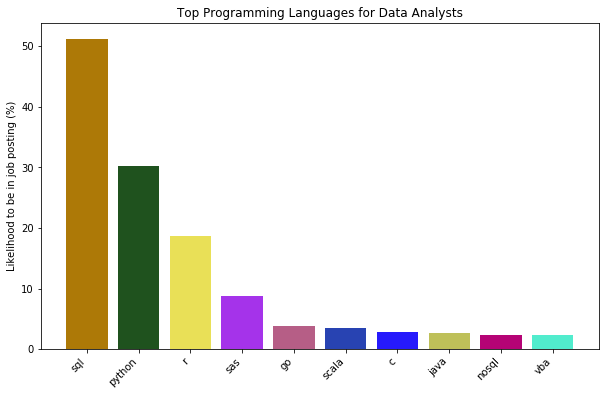

   keywords  counts  percentage
0       sql   24836   51.257920
2    python   14682   30.301529
5         r    9010   18.595340
6       sas    4254    8.779642
14       go    1868    3.855282
17    scala    1711    3.531257
20        c    1334    2.753183
22     java    1297    2.676821
25    nosql    1136    2.344540
27      vba    1111    2.292944


In [12]:


top_keywords = filtered_keywords(jobs_all, keywords_programming, title="Top Programming Languages for Data Analysts")


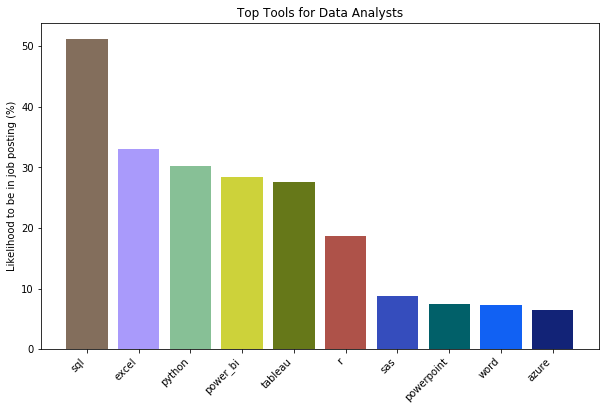

     keywords  counts  percentage
0         sql   24836   51.257920
1       excel   15989   32.998989
2      python   14682   30.301529
3    power_bi   13758   28.394527
4     tableau   13369   27.591687
5           r    9010   18.595340
6         sas    4254    8.779642
7  powerpoint    3616    7.462902
8        word    3502    7.227623
9       azure    3141    6.482571


,keywords,counts,percentage
0,sql,24836,51.257920
1,excel,15989,32.998989
2,python,14682,30.301529
3,power_bi,13758,28.394527
4,tableau,13369,27.591687
5,r,9010,18.595340
6,sas,4254,8.779642
7,powerpoint,3616,7.462902
8,word,3502,7.227623
9,azure,3141,6.482571


In [13]:
filtered_keywords(jobs_all, keywords, title="Top Tools for Data Analysts")